In [1]:
#dataset link.
#https://huggingface.co/datasets/kanishka089/weather

In [2]:
#importing necessary library.
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import matplotlib.style as style;
import seaborn as sns;
from sklearn.preprocessing import LabelEncoder;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.preprocessing import MinMaxScaler;
from sklearn.svm import SVC;
from sklearn.neighbors import KNeighborsClassifier;
from xgboost import XGBClassifier;

In [3]:
#Loading dataset.

In [4]:
weather_df=pd.read_csv("weather.csv");
print("Dataframe of dataset.");
print(weather_df);

Dataframe of dataset.
          id  Temperature  Humidity  Wind Speed  Precipitation    Cloud Cover  \
0          1           14        73         9.5             82  partly cloudy   
1          2           39        96         8.5             71  partly cloudy   
2          3           30        64         7.0             16          clear   
3          4           38        83         1.5             82          clear   
4          5           27        74        17.0             66       overcast   
...      ...          ...       ...         ...            ...            ...   
13195  13196           10        74        14.5             71       overcast   
13196  13197           -1        76         3.5             23         cloudy   
13197  13198           30        77         5.5             28       overcast   
13198  13199            3        76        10.0             94       overcast   
13199  13200           -5        38         0.0             92       overcast   

     

In [5]:
#cleaning and processing data

In [6]:
print("shape of weather dataframe");
print(weather_df.shape);
nof_of_rows_weather_df=weather_df.shape[0];
no_of_column_weather_df=weather_df.shape[1];
print();
print("no of rows=",nof_of_rows_weather_df);
print();
print("no of columns=",no_of_column_weather_df);

shape of weather dataframe
(13200, 12)

no of rows= 13200

no of columns= 12


In [7]:
column_name=weather_df.columns;
print("Column name of dataset.");
print(column_name);
print();
print("Column name of features");
df_features=column_name[0:-1];
print(df_features);
print();
print("Column name of target");
df_target=column_name[-1:];
print(df_target);

Column name of dataset.
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility', 'Location', 'target'],
      dtype='object')

Column name of features
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility', 'Location'],
      dtype='object')

Column name of target
Index(['target'], dtype='object')


In [8]:
df_dataype_columns=weather_df.dtypes;
print("Datatype of column.");
print(df_dataype_columns);

Datatype of column.
id                        int64
Temperature               int64
Humidity                  int64
Wind Speed              float64
Precipitation             int64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility              float64
Location                 object
target                   object
dtype: object


In [9]:
print("Numerical column");
numerical_column=weather_df.select_dtypes(include=['int64','float64']).columns;
print(numerical_column);
print();
print("Ctegorical column");
categorical_column=weather_df.select_dtypes(include=['object']).columns;
print(categorical_column);
print();
print("Ctegorical column without target");
final_categorical_column=categorical_column[0:-1];
print(final_categorical_column);

Numerical column
Index(['id', 'Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')

Ctegorical column
Index(['Cloud Cover', 'Season', 'Location', 'target'], dtype='object')

Ctegorical column without target
Index(['Cloud Cover', 'Season', 'Location'], dtype='object')


In [10]:
print("NaN values count");
print(weather_df.isnull().sum());

NaN values count
id                      0
Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
target                  0
dtype: int64


In [11]:
target_class=weather_df["target"].value_counts();
print(target_class);

target
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [12]:
#from above we know that our target have balance class.

In [13]:
#from above we know that no column have NaN values.So we process data clenaing ahead.
#since id column doesn't provid us any insight and independent with other column 
#i wil remove it.

In [14]:
final_numeric_column=numerical_column[1:];
print("Final numerical column");
print(final_numeric_column);

Final numerical column
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility'],
      dtype='object')


In [15]:
#we cannot train our model with categorical value so i will use panda library to change
#caregorical value into numerical.

In [16]:
categorical_column_df=weather_df[final_categorical_column];
print("dataframe that have only categorical features.");
print(categorical_column_df);

dataframe that have only categorical features.
         Cloud Cover  Season  Location
0      partly cloudy  Winter    inland
1      partly cloudy  Spring    inland
2              clear  Spring  mountain
3              clear  Spring   coastal
4           overcast  Winter  mountain
...              ...     ...       ...
13195       overcast  Summer  mountain
13196         cloudy  Winter   coastal
13197       overcast  Autumn   coastal
13198       overcast  Winter    inland
13199       overcast  Autumn  mountain

[13200 rows x 3 columns]


In [17]:
dummy_df=pd.get_dummies(categorical_column_df,drop_first=True).replace([True,False],[1,0]);
print("Dummy dataframe");
print(dummy_df);

Dummy dataframe
       Cloud Cover_cloudy  Cloud Cover_overcast  Cloud Cover_partly cloudy  \
0                       0                     0                          1   
1                       0                     0                          1   
2                       0                     0                          0   
3                       0                     0                          0   
4                       0                     1                          0   
...                   ...                   ...                        ...   
13195                   0                     1                          0   
13196                   1                     0                          0   
13197                   0                     1                          0   
13198                   0                     1                          0   
13199                   0                     1                          0   

       Season_Spring  Season_Summer  Season_Win

C:\Users\rupak\AppData\Local\Temp\ipykernel_16888\3076278425.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy_df=pd.get_dummies(categorical_column_df,drop_first=True).replace([True,False],[1,0]);


In [18]:
#we have to join two table numerical features dataframe and dummy dataframe

In [19]:
clean_weather_df=pd.concat([weather_df[final_numeric_column],dummy_df],axis=1);
print("final clean dataframe");
print(clean_weather_df);

final clean dataframe
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73         9.5             82               1010.82   
1               39        96         8.5             71               1011.43   
2               30        64         7.0             16               1018.72   
3               38        83         1.5             82               1026.25   
4               27        74        17.0             66                990.67   
...            ...       ...         ...            ...                   ...   
13195           10        74        14.5             71               1003.15   
13196           -1        76         3.5             23               1067.23   
13197           30        77         5.5             28               1012.69   
13198            3        76        10.0             94                984.27   
13199           -5        38         0.0             92               1015.37   

     

In [20]:
#changing datatype of features.
print("Datatype of features.");
print(clean_weather_df.dtypes);
print();
clean_weather_df=clean_weather_df.astype(int);
print("Datatype of features.");
print(clean_weather_df.dtypes);
print();

Datatype of features.
Temperature                    int64
Humidity                       int64
Wind Speed                   float64
Precipitation                  int64
Atmospheric Pressure         float64
UV Index                       int64
Visibility                   float64
Cloud Cover_cloudy             int64
Cloud Cover_overcast           int64
Cloud Cover_partly cloudy      int64
Season_Spring                  int64
Season_Summer                  int64
Season_Winter                  int64
Location_inland                int64
Location_mountain              int64
dtype: object

Datatype of features.
Temperature                  int32
Humidity                     int32
Wind Speed                   int32
Precipitation                int32
Atmospheric Pressure         int32
UV Index                     int32
Visibility                   int32
Cloud Cover_cloudy           int32
Cloud Cover_overcast         int32
Cloud Cover_partly cloudy    int32
Season_Spring                int32
S

In [21]:
final_weather_dataframe=pd.concat([clean_weather_df,weather_df["target"]],axis=1);
print("Final dataframe after cleaning.");
print(final_weather_dataframe);

Final dataframe after cleaning.
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015

                           Temperature  Humidity  Wind Speed  Precipitation  \
Temperature                   1.000000 -0.207969   -0.070407      -0.287206   
Humidity                     -0.207969  1.000000    0.406443       0.638631   
Wind Speed                   -0.070407  0.406443    1.000000       0.443731   
Precipitation                -0.287206  0.638631    0.443731       1.000000   
Atmospheric Pressure          0.209259 -0.120681   -0.078407      -0.177479   
UV Index                      0.374773 -0.342694   -0.068574      -0.291601   
Visibility                    0.250053 -0.478703   -0.313672      -0.456079   
Cloud Cover_cloudy           -0.063484 -0.172823   -0.061135      -0.001964   
Cloud Cover_overcast         -0.351653  0.363061    0.220274       0.403088   
Cloud Cover_partly cloudy     0.094095 -0.036003   -0.016126      -0.091756   
Season_Spring                 0.185596 -0.099526   -0.048922      -0.112516   
Season_Summer                 0.190761 -0.075871   -

C:\Users\rupak\AppData\Local\Temp\ipykernel_16888\440740061.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  correlation_matrix = final_weather_dataframe.replace(["Rainy","Snowy","Sunny","Cloudy"],[1,2,3,4]).corr();


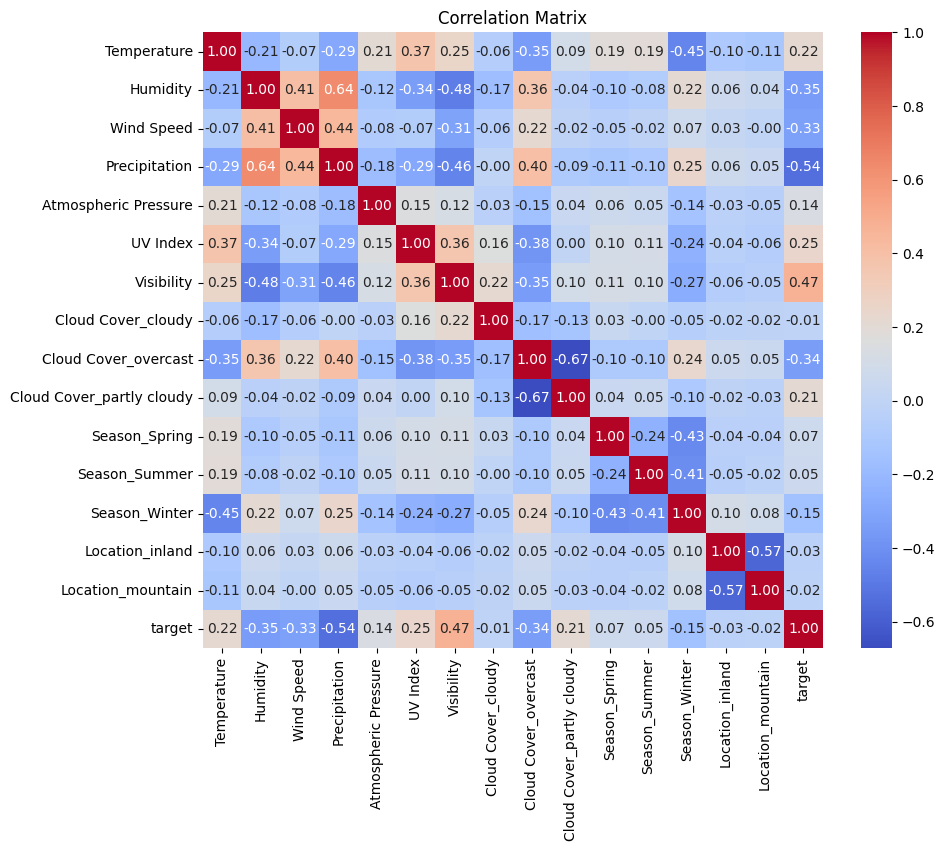

In [22]:
#Showing corelation between features.
correlation_matrix = final_weather_dataframe.replace(["Rainy","Snowy","Sunny","Cloudy"],[1,2,3,4]).corr();
print(correlation_matrix);
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True);
plt.title('Correlation Matrix');
plt.show();

In [23]:
print("NaN values count");
print(final_weather_dataframe.isnull().sum());

NaN values count
Temperature                  0
Humidity                     0
Wind Speed                   0
Precipitation                0
Atmospheric Pressure         0
UV Index                     0
Visibility                   0
Cloud Cover_cloudy           0
Cloud Cover_overcast         0
Cloud Cover_partly cloudy    0
Season_Spring                0
Season_Summer                0
Season_Winter                0
Location_inland              0
Location_mountain            0
target                       0
dtype: int64


In [24]:
print("shape of initial weather dataframe");
print(weather_df.shape);
nof_of_rows_weather_df=weather_df.shape[0];
no_of_column_weather_df=weather_df.shape[1];
print();
print("no of rows=",nof_of_rows_weather_df);
print();
print("no of columns=",no_of_column_weather_df);
print();
print("shape of clean weather dataframe");
print(final_weather_dataframe.shape);
no_of_rows_clean_weather_df=final_weather_dataframe.shape[0];
no_of_column_clean_weather_df=final_weather_dataframe.shape[1];
print();
print("no of rows=",no_of_rows_clean_weather_df);
print();
print("no of columns=",no_of_column_clean_weather_df);

shape of initial weather dataframe
(13200, 12)

no of rows= 13200

no of columns= 12

shape of clean weather dataframe
(13200, 16)

no of rows= 13200

no of columns= 16


In [25]:
#Split the dataset
#we will provide 80% row for training and 20% for testing.

In [26]:
x=final_weather_dataframe.drop(columns=["target"],axis=1);
y=final_weather_dataframe["target"];
print("features column value");
print(x);
print();
print("target column value");
print(y);
print();
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51);
print("xtrain");
print();
print(x_train);
print();
print(x_train.shape);
print();
print("xtest");
print();
print(x_test);
print();
print(x_test.shape);
print();
print("ytrain");
print();
print(y_train);
print();
print(y_train.shape);
print();
print("ytest");
print();
print(y_test);
print();
print(y_test.shape);

features column value
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015   

     

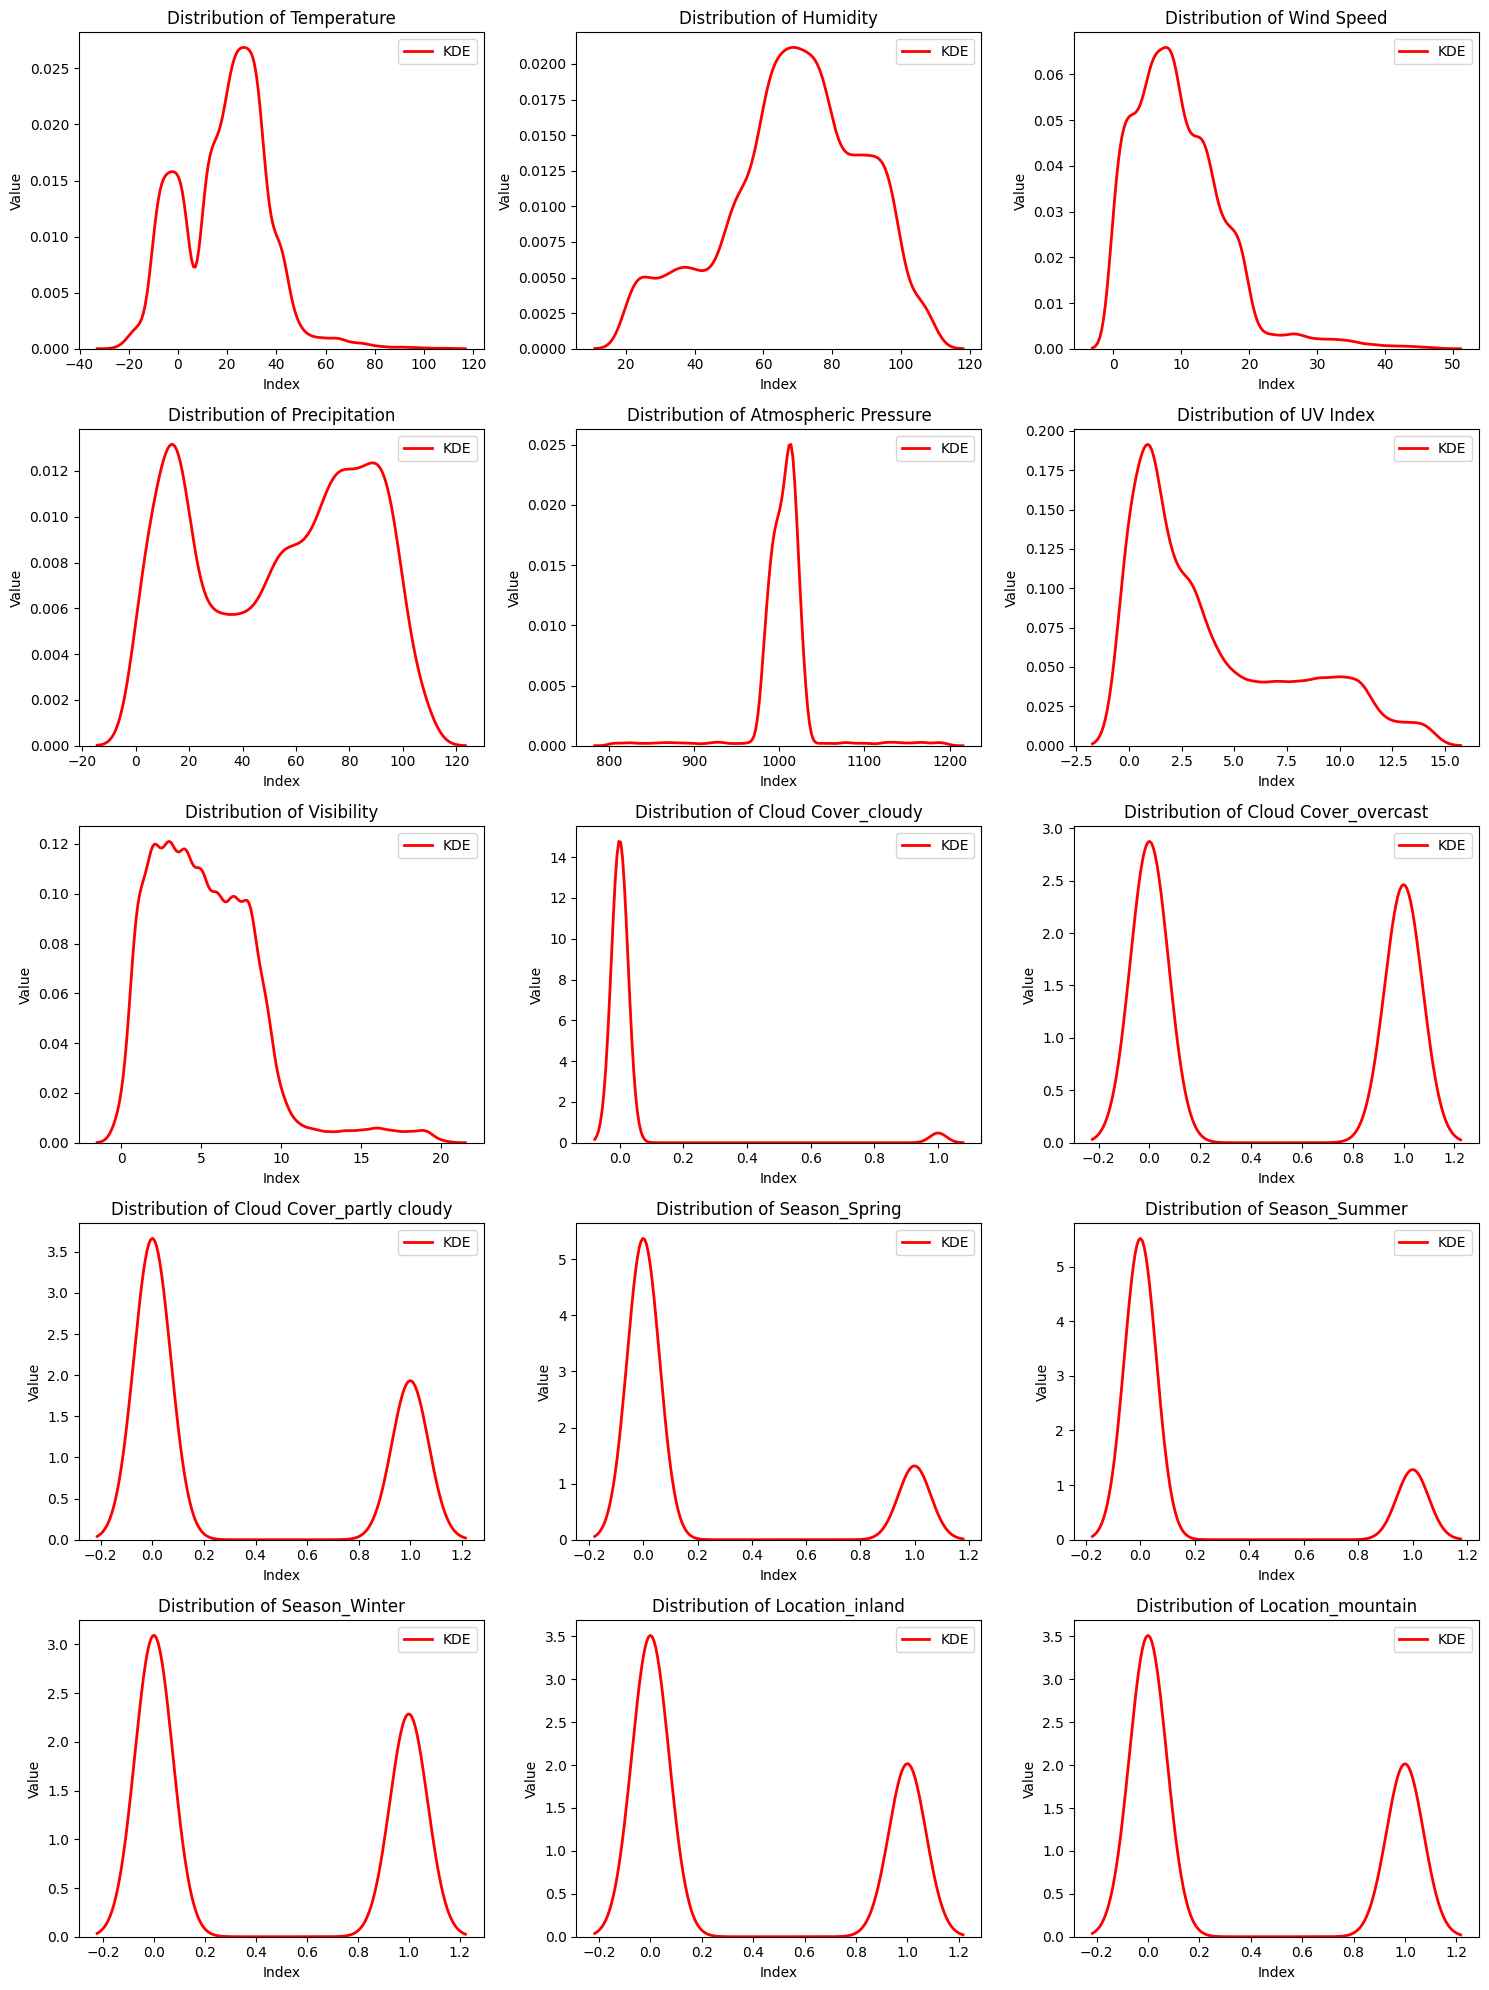

In [27]:
# List of features to check for Gaussian distribution
features_to_check = final_weather_dataframe.drop(columns=["target"], axis=1).columns;

# Create a figure with subplots
n_features = len(features_to_check);
n_cols = 3  # Number of columns per row
n_rows = (n_features // n_cols) + (n_features % n_cols > 0);

# Set up the figure
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4));
axes = axes.flatten(); # Flatten the axes array for easier indexing

# Plot each feature
for i, feature in enumerate(features_to_check):
    sns.kdeplot(data=final_weather_dataframe[feature], ax=axes[i], color="red", lw=2, label='KDE')
    axes[i].set_title(f'Distribution of {feature}');
    axes[i].set_xlabel('Index');
    axes[i].set_ylabel('Value');
    axes[i].legend();

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]);

# Adjust layout
plt.tight_layout();
plt.show();

In [28]:
#From above graphical representation maximum features don't follow guassian distribution
#so i will use MinMax scaler for feature scalling.

In [29]:
sc = MinMaxScaler();
sc.fit(x_train);
X_train = sc.transform(x_train);
X_test = sc.transform(x_test);
print("X_train");
print();
print(X_train);
print();
print("X_test");
print();
print(X_test);

X_train

[[0.19548872 0.73033708 0.125      ... 1.         0.         1.        ]
 [0.40601504 0.51685393 0.02083333 ... 0.         1.         0.        ]
 [0.48120301 0.3258427  0.02083333 ... 0.         0.         0.        ]
 ...
 [0.47368421 0.76404494 0.39583333 ... 0.         1.         0.        ]
 [0.28571429 0.33707865 0.125      ... 0.         0.         1.        ]
 [0.19548872 0.5505618  0.39583333 ... 1.         1.         0.        ]]

X_test

[[0.42857143 0.51685393 0.29166667 ... 0.         0.         0.        ]
 [0.39097744 0.35955056 0.02083333 ... 0.         1.         0.        ]
 [0.43609023 0.47191011 0.20833333 ... 0.         1.         0.        ]
 ...
 [0.13533835 0.51685393 0.375      ... 1.         1.         0.        ]
 [0.35338346 0.47191011 0.27083333 ... 0.         0.         1.        ]
 [0.38345865 0.66292135 0.27083333 ... 0.         1.         0.        ]]


In [30]:
#Fitting models

In [31]:
# #1.KNN model
# classifier = KNeighborsClassifier(n_neighbors=1);
# classifier=classifier.fit(X_train, y_train);
# score_value=classifier.score(X_test,y_test);
# predict_value=classifier.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [32]:
# classifier = KNeighborsClassifier(n_neighbors=2);
# fit_knn=classifier.fit(X_train, y_train);
# score_value=classifier.score(X_test,y_test);
# predict_value=classifier.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [33]:
# classifier = KNeighborsClassifier(n_neighbors=3);
# fit_knn=classifier.fit(X_train, y_train);
# score_value=classifier.score(X_test,y_test);
# predict_value=classifier.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [34]:
#2.SVM model

In [35]:
# classification_rbf_2 = SVC(kernel='rbf');
# classification_rbf_2.fit(X_train, y_train);
# score_value=classification_rbf_2.score(X_test, y_test);
# predict_value=classification_rbf_2.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [36]:
# classification_poly = SVC(kernel='poly', degree=2)
# classification_poly.fit(X_train, y_train);
# score_value=classification_poly.score(X_test, y_test);
# predict_value=classification_poly.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [37]:
# classification_linear = SVC(kernel='linear');
# classification_linear.fit(X_train, y_train);
# score_value=classification_linear.score(X_test, y_test);
# predict_value=classification_linear.predict(X_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [38]:
#3.XGBoost
lbe=LabelEncoder();
lbe_column=lbe.fit_transform(final_weather_dataframe["target"]);
print("lbe column");
print(lbe_column);
print();
print("Traget column class and their occurence number");
print(pd.DataFrame(lbe_column).value_counts());
print();
# Print the mapping of target values to numerical values
print("Mapping of target values to numerical values:")
for index, class_label in enumerate(lbe.classes_):
    print(f"{class_label} -> {index}")
print();
final_weather_dataframe["target"]=lbe_column;
print("final_weather_dataframe");
print(final_weather_dataframe);

lbe column
[1 0 3 ... 0 2 1]

Traget column class and their occurence number
0
0    3300
1    3300
2    3300
3    3300
Name: count, dtype: int64

Mapping of target values to numerical values:
Cloudy -> 0
Rainy -> 1
Snowy -> 2
Sunny -> 3

final_weather_dataframe
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197    

In [39]:
x=final_weather_dataframe.drop(columns=["target"],axis=1);
y=final_weather_dataframe["target"];
print("features column value");
print(x);
print();
print("target column value");
print(y);
print();
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51);
print("xtrain");
print();
print(x_train);
print();
print(x_train.shape);
print();
print("xtest");
print();
print(x_test);
print();
print(x_test.shape);
print();
print("ytrain");
print();
print(y_train);
print();
print(y_train.shape);
print();
print("ytest");
print();
print(y_test);
print();
print(y_test.shape);

features column value
       Temperature  Humidity  Wind Speed  Precipitation  Atmospheric Pressure  \
0               14        73           9             82                  1010   
1               39        96           8             71                  1011   
2               30        64           7             16                  1018   
3               38        83           1             82                  1026   
4               27        74          17             66                   990   
...            ...       ...         ...            ...                   ...   
13195           10        74          14             71                  1003   
13196           -1        76           3             23                  1067   
13197           30        77           5             28                  1012   
13198            3        76          10             94                   984   
13199           -5        38           0             92                  1015   

     

In [40]:
# xgb_model =XGBClassifier()
# xgb_model.fit(x_train, y_train)
# score_value=xgb_model.score(x_test, y_test);
# predict_value=xgb_model.predict(x_test);
# print("score value");
# print(score_value);
# print("predict value");
# print(predict_value);

In [41]:
sc = MinMaxScaler();
sc.fit(x_train);
X_train = sc.transform(x_train);
X_test = sc.transform(x_test);
print("X_train");
print();
print(X_train);
print();
print("X_test");
print();
print(X_test);

X_train

[[0.19548872 0.73033708 0.125      ... 1.         0.         1.        ]
 [0.40601504 0.51685393 0.02083333 ... 0.         1.         0.        ]
 [0.48120301 0.3258427  0.02083333 ... 0.         0.         0.        ]
 ...
 [0.47368421 0.76404494 0.39583333 ... 0.         1.         0.        ]
 [0.28571429 0.33707865 0.125      ... 0.         0.         1.        ]
 [0.19548872 0.5505618  0.39583333 ... 1.         1.         0.        ]]

X_test

[[0.42857143 0.51685393 0.29166667 ... 0.         0.         0.        ]
 [0.39097744 0.35955056 0.02083333 ... 0.         1.         0.        ]
 [0.43609023 0.47191011 0.20833333 ... 0.         1.         0.        ]
 ...
 [0.13533835 0.51685393 0.375      ... 1.         1.         0.        ]
 [0.35338346 0.47191011 0.27083333 ... 0.         0.         1.        ]
 [0.38345865 0.66292135 0.27083333 ... 0.         1.         0.        ]]


In [42]:
print('X_test shape');
print(X_test.shape);
print("features varaible name");
print(x.columns);
print('y_test shape');
print(y_test.shape);
print("target variable name");
print("target");


X_test shape
(2640, 15)
features varaible name
Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation',
       'Atmospheric Pressure', 'UV Index', 'Visibility', 'Cloud Cover_cloudy',
       'Cloud Cover_overcast', 'Cloud Cover_partly cloudy', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Location_inland',
       'Location_mountain'],
      dtype='object')
y_test shape
(2640,)
target variable name
target


In [43]:
# xgb_model =XGBClassifier()
xgb_model = XGBClassifier();
xgb_model.fit(X_train, y_train)
score_value=xgb_model.score(X_test, y_test);
predict_value=xgb_model.predict(X_test);
print("score value");
print(score_value);
print("predict value");
print(predict_value);
print();
# Mapping of target values to numerical values:
# Cloudy -> 0
# Rainy -> 1
# Snowy -> 2
# Sunny -> 3
print("Predicted value in class form");
predict_value_df=pd.DataFrame(predict_value,columns=["target"]);
print(predict_value_df["target"].replace([0,1,2,3],["Cloudy","Rainy","Snowy","Sunny"]));

score value
0.9109848484848485
predict value
[1 3 1 ... 2 1 0]

Predicted value in class form
0        Rainy
1        Sunny
2        Rainy
3       Cloudy
4        Sunny
         ...  
2635     Sunny
2636     Rainy
2637     Snowy
2638     Rainy
2639    Cloudy
Name: target, Length: 2640, dtype: object


In [44]:
import tensorflow as tf
import json
import re

In [45]:

# Function to convert XGBoost model to TensorFlow
def create_xgboost_tf_model(xgb_model, n_features, n_classes=4):
    # Extract trees from XGBoost model
    booster = xgb_model.get_booster()
    trees = booster.get_dump(with_stats=True, dump_format='json')
    trees_json = [json.loads(tree) for tree in trees]
    
    class XGBoostTFModel(tf.Module):
        def __init__(self):
            self.n_classes = n_classes
            self.n_features = n_features
        
        @tf.function(input_signature=[tf.TensorSpec(shape=[None, n_features], dtype=tf.float32)])
        def __call__(self, x):
            batch_size = tf.shape(x)[0]
            scores = tf.zeros([batch_size, self.n_classes], dtype=tf.float32)
            
            # Evaluate each tree
            for tree_json in trees_json:
                tree_scores = self._evaluate_tree(x, tree_json)
                scores += tree_scores
            
            # Apply softmax to get probabilities and predict class
            probabilities = tf.nn.softmax(scores)
            return tf.argmax(probabilities, axis=1, output_type=tf.int32)
        
        def _evaluate_tree(self, inputs, tree):
            batch_size = tf.shape(inputs)[0]
            scores = tf.zeros([batch_size, self.n_classes], dtype=tf.float32)
            
            def traverse_node(node, x):
                if 'leaf' in node:
                    # Leaf node: return score (same for all classes for simplicity)
                    leaf_value = float(node['leaf'])
                    return tf.fill([tf.shape(x)[0], self.n_classes], leaf_value)
                
                # Internal node
                # Extract feature index from 'f<index>' format
                split_feature = node['split']
                feature_idx = int(re.search(r'\d+', split_feature).group())
                threshold = float(node['split_condition'])
                left_child = node['children'][0]
                right_child = node['children'][1]
                
                # Compare feature value with threshold
                condition = x[:, feature_idx] <= threshold
                
                # Initialize output scores
                left_scores = tf.zeros([tf.shape(x)[0], self.n_classes], dtype=tf.float32)
                right_scores = tf.zeros([tf.shape(x)[0], self.n_classes], dtype=tf.float32)
                
                # Recursively evaluate children
                left_mask = tf.expand_dims(tf.cast(condition, tf.float32), -1)
                right_mask = tf.expand_dims(tf.cast(~condition, tf.float32), -1)
                
                if 'leaf' not in left_child:
                    left_scores = traverse_node(left_child, x)
                else:
                    left_scores = tf.fill([tf.shape(x)[0], self.n_classes], float(left_child['leaf']))
                
                if 'leaf' not in right_child:
                    right_scores = traverse_node(right_child, x)
                else:
                    right_scores = tf.fill([tf.shape(x)[0], self.n_classes], float(right_child['leaf']))
                
                return left_mask * left_scores + right_mask * right_scores
            
            return traverse_node(tree, inputs)
    
    return XGBoostTFModel()

# Create TensorFlow model
n_features = X_train.shape[1]
xgb_tf_model = create_xgboost_tf_model(xgb_model, n_features)

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_concrete_functions(
    [xgb_tf_model.__call__.get_concrete_function()]
)
converter.experimental_new_converter = True  # Enable new converter for complex ops
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('xgb_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("TFLite model saved as 'xgb_model.tflite'")

# Print the mapping of target labels for reference
print("\nMapping of target values to numerical values:")
for index, class_label in enumerate(lbe.classes_):
    print(f"{class_label} -> {index}")

# Optional: Test the TFLite model
interpreter = tf.lite.Interpreter(model_path='xgb_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test with a single sample from X_test
test_sample = X_test[0:1].astype(np.float32)  # Take first test sample
interpreter.set_tensor(input_details[0]['index'], test_sample)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = lbe.inverse_transform(output_data)[0]
print(f"\nPredicted label for test sample: {predicted_label}")

TFLite model saved as 'xgb_model.tflite'

Mapping of target values to numerical values:
Cloudy -> 0
Rainy -> 1
Snowy -> 2
Sunny -> 3

Predicted label for test sample: Cloudy


In [46]:
# # Models and their scores
# models = ["KNN (n=1)", "KNN (n=2)", "KNN (n=3)", 
#           "SVM (RBF)", "SVM (Poly)", "SVM (Linear)", "XGBoost"];
# scores = [0.8878, 0.8840, 0.8902, 0.8973, 0.8932, 0.8792, 0.9109];

# # Create bar plot
# plt.figure(figsize=(10,5));
# plt.bar(models, scores, color='skyblue');

# # Labels and title
# plt.xlabel("Models");
# plt.ylabel("Accuracy Score");
# plt.title("Comparison of Model Accuracy Scores");
# plt.ylim(0.85, 0.92);  # Adjusting y-axis for better visualization

# # Rotate x labels for better readability
# plt.xticks(rotation=45);

# # Show values on top of bars
# for i, v in enumerate(scores):
#     plt.text(i, v + 0.002, str(v), ha='center', fontsize=10);

# # Show plot
# plt.show();

In [47]:
#From above bar chart we can see XGBoost model provide highest accuracy as
#compared to KNN and SVM.

In [48]:
# Required imports
import tensorflow as tf
import numpy as np
import json
import re
import xgboost as xgb
import os  # For file checks

In [ ]:
#tflite web

In [47]:
import tensorflow as tf
import xgboost as xgb
import numpy as np
import json
import re
import os

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Function to parse XGBoost tree JSON into a flat structure
def parse_tree_to_arrays(tree_json, max_depth=10):
    nodes = []
    def traverse_node(node, depth=0):
        if depth > max_depth or 'leaf' in node:
            leaf_value = float(node.get('leaf', 0.0))
            nodes.append({'leaf': leaf_value, 'feature_idx': -1, 'threshold': 0.0, 'left_idx': -1, 'right_idx': -1})
            return len(nodes) - 1
        feature_idx = int(re.search(r'f(\d+)', node['split']).group(1)) if 'split' in node else -1
        threshold = float(node.get('split_condition', 0.0))
        left_child = node.get('children', [{}])[0]
        right_child = node.get('children', [{}])[1]
        left_idx = traverse_node(left_child, depth + 1)
        right_idx = traverse_node(right_child, depth + 1)
        nodes.append({
            'feature_idx': feature_idx,
            'threshold': threshold,
            'left_idx': left_idx,
            'right_idx': right_idx,
            'leaf': 0.0
        })
        return len(nodes) - 1
    root_idx = traverse_node(tree_json)
    return nodes

# Define the XGBoost-to-TFLite conversion function
def create_xgboost_tf_model(xgb_model, n_features, n_classes=4):
    booster = xgb_model.get_booster()
    trees = booster.get_dump(with_stats=True, dump_format='json')
    trees_json = [json.loads(tree) for tree in trees]
    tree_structures = [parse_tree_to_arrays(tree) for tree in trees_json]

    class XGBoostTFModel(tf.Module):
        def __init__(self):
            super().__init__()
            self.n_classes = n_classes
            self.n_features = n_features
            self.num_trees = len(tree_structures)
            # Store tree structures as TensorFlow constants
            self.tree_nodes = []
            for tree in tree_structures:
                feature_indices = tf.constant([n['feature_idx'] for n in tree], dtype=tf.int32)
                thresholds = tf.constant([n['threshold'] for n in tree], dtype=tf.float32)
                left_indices = tf.constant([n['left_idx'] for n in tree], dtype=tf.int32)
                right_indices = tf.constant([n['right_idx'] for n in tree], dtype=tf.int32)
                leaf_values = tf.constant([n['leaf'] for n in tree], dtype=tf.float32)
                self.tree_nodes.append((feature_indices, thresholds, left_indices, right_indices, leaf_values))

        @tf.function(input_signature=[tf.TensorSpec(shape=[None, n_features], dtype=tf.float32)])
        def __call__(self, x):
            batch_size = tf.shape(x)[0]
            scores = tf.zeros([batch_size, self.n_classes], dtype=tf.float32)

            # Evaluate each tree sequentially
            for tree_idx in range(self.num_trees):
                feature_indices, thresholds, left_indices, right_indices, leaf_values = self.tree_nodes[tree_idx]
                tree_scores = self._evaluate_tree(x, feature_indices, thresholds, left_indices, right_indices, leaf_values)
                scores += tree_scores

            probabilities = tf.nn.softmax(scores)
            return tf.argmax(probabilities, axis=1, output_type=tf.int32)

        def _evaluate_tree(self, inputs, feature_indices, thresholds, left_indices, right_indices, leaf_values):
            batch_size = tf.shape(inputs)[0]
            scores = tf.zeros([batch_size, self.n_classes], dtype=tf.float32)
            node_indices = tf.zeros([batch_size], dtype=tf.int32)

            def body(i, node_indices, scores):
                # Gather node properties for the current node_indices
                node_mask = tf.range(tf.shape(node_indices)[0]) < batch_size
                valid_node_indices = tf.where(node_mask, node_indices, 0)
                
                # Extract node properties
                feature_idx = tf.gather(feature_indices, valid_node_indices)
                threshold = tf.gather(thresholds, valid_node_indices)
                left_idx = tf.gather(left_indices, valid_node_indices)
                right_idx = tf.gather(right_indices, valid_node_indices)
                leaf_value = tf.gather(leaf_values, valid_node_indices)

                # Create a mask for leaf nodes
                is_leaf = tf.equal(feature_idx, -1)
                
                # Update scores for leaf nodes
                node_scores = tf.where(is_leaf, leaf_value, 0.0)
                # Expand node_scores to match [batch_size, n_classes]
                node_scores_expanded = tf.tile(tf.expand_dims(node_scores, -1), [1, self.n_classes])
                scores += tf.scatter_nd(
                    tf.expand_dims(tf.range(batch_size, dtype=tf.int32), 1),
                    node_scores_expanded,
                    [batch_size, self.n_classes]
                )

                # Compute feature values for all features to avoid dynamic indexing
                feature_values = tf.zeros([batch_size], dtype=tf.float32)
                for f_idx in range(self.n_features):
                    feature_mask = tf.equal(feature_idx, f_idx)
                    feature_values += tf.where(
                        feature_mask,
                        tf.gather(inputs, f_idx, axis=1),
                        tf.zeros([batch_size], dtype=tf.float32)
                    )
                
                # Compute conditions for non-leaf nodes
                condition = tf.where(is_leaf, False, feature_values <= threshold)
                
                # Update node indices
                next_indices = tf.where(is_leaf, node_indices, tf.where(condition, left_idx, right_idx))
                
                return i + 1, next_indices, scores

            max_nodes = tf.shape(feature_indices)[0]
            _, _, final_scores = tf.while_loop(
                cond=lambda i, *_: i < max_nodes,
                body=body,
                loop_vars=[0, node_indices, scores],
                shape_invariants=[
                    tf.TensorShape([]),
                    tf.TensorShape([None]),
                    tf.TensorShape([None, self.n_classes])
                ]
            )
            return final_scores

    return XGBoostTFModel()

# Create TensorFlow model
n_features = X_train.shape[1]
xgb_tf_model = create_xgboost_tf_model(xgb_model, n_features, n_classes=len(lbe.classes_))

# Convert to TFLite with strict web compatibility
converter = tf.lite.TFLiteConverter.from_concrete_functions(
    [xgb_tf_model.__call__.get_concrete_function()]
)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.experimental_new_converter = True
converter.allow_custom_ops = False
converter.optimizations = [tf.lite.Optimize.DEFAULT]
try:
    tflite_model = converter.convert()
except Exception as e:
    print(f"Conversion error: {e}")
    raise

# Save the TFLite model
model_path = 'xgb_model_web.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)
print(f"TFLite model saved as '{model_path}'")

# Print label mapping
print("\nMapping of target values to numerical values:")
for index, class_label in enumerate(lbe.classes_):
    print(f"{class_label} -> {index}")

# Load TFLite model for testing
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("\nInput details:", input_details)
print("Output details:", output_details)

# Test 1: Single sample prediction
test_sample = X_test[0:1].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], test_sample)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = output_data[0]
predicted_label = lbe.inverse_transform([predicted_class])[0]
print(f"\nTest 1: Single Sample Prediction")
print(f"Predicted label: {predicted_label}")
original_pred = xgb_model.predict(test_sample)[0]
original_label = lbe.inverse_transform([original_pred])[0]
print(f"Original XGBoost label: {original_label}")
print("Match:", predicted_label == original_label)

# Test 2: Batch prediction
batch_size = min(10, X_test.shape[0])
batch_test = X_test[:batch_size].astype(np.float32)
interpreter.resize_tensor_input(input_details[0]['index'], [batch_size, n_features])
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], batch_test)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_classes = output_data
predicted_labels = lbe.inverse_transform(predicted_classes)
original_preds = xgb_model.predict(batch_test)
original_labels = lbe.inverse_transform(original_preds)

print("\nTest 2: Batch Prediction Results:")
for i in range(batch_size):
    print(f"Sample {i+1}: TFLite label = {predicted_labels[i]}, Original XGBoost label = {original_labels[i]}, Match = {predicted_labels[i] == original_labels[i]}")
batch_accuracy = np.mean(predicted_classes == original_preds)
print(f"Batch accuracy match: {batch_accuracy * 100:.2f}%")

# Test 3: Full test set prediction
tflite_preds = []
interpreter.resize_tensor_input(input_details[0]['index'], [1, n_features])
interpreter.allocate_tensors()
for sample in X_test:
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1).astype(np.float32))
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    tflite_preds.append(output_data[0])
tflite_preds = np.array(tflite_preds)
original_preds = xgb_model.predict(X_test)
full_accuracy = np.mean(tflite_preds == original_preds)
print(f"\nTest 3: Full Test Set Accuracy Match: {full_accuracy * 100:.2f}%")

# Test 4: Edge cases
# 4.1: Zero input
zero_input = np.zeros((1, n_features), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], zero_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\nTest 4.1: Zero Input Prediction Class:", output_data[0])

# 4.2: Extreme large values
extreme_large = np.full((1, n_features), 1e6, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], extreme_large)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Test 4.2: Extreme Large Input Prediction Class:", output_data[0])

# 4.3: Extreme small values
extreme_small = np.full((1, n_features), -1e6, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], extreme_small)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Test 4.3: Extreme Small Input Prediction Class:", output_data[0])

# 4.4: NaN input
nan_input = np.full((1, n_features), np.nan, dtype=np.float32)
try:
    interpreter.set_tensor(input_details[0]['index'], nan_input)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Test 4.4: NaN Input Prediction Class:", output_data[0])
except Exception as e:
    print("Test 4.4: NaN Input Test Error (expected possible failure):", str(e))

# 4.5: Invalid shape
try:
    invalid_input = np.random.rand(1, n_features + 1).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], invalid_input)
    interpreter.invoke()
    print("Test 4.5: Invalid Shape Test Failed (unexpected)")
except ValueError as e:
    print("Test 4.5: Invalid Shape Test Error (expected):", str(e))

# Test 5: Model op compatibility check
print("\nTest 5: TFLite Model Op Compatibility Check")
try:
    interpreter.allocate_tensors()
    op_details = interpreter.get_tensor_details()
    print("Tensors in model:", len(op_details))
    model_ops = set()
    for tensor in op_details:
        if 'op_name' in tensor:
            model_ops.add(tensor['op_name'])
    print("Detected ops:", model_ops)
    unsupported_ops = ['WHILE', 'IF', 'LOOP', 'CUSTOM']
    has_unsupported = any(op in model_ops for op in unsupported_ops)
    print("Has potential unsupported ops for tflite_web:", has_unsupported)
    if has_unsupported:
        print("Warning: Model contains ops that may not be supported in tflite_web. Consider simplifying the XGBoost model.")
except Exception as e:
    print(f"Op compatibility check failed: {e}")

# Test 6: File integrity check
if os.path.exists(model_path):
    print(f"\nTest 6: Model File Integrity")
    print(f"Model file '{model_path}' exists, size: {os.path.getsize(model_path)} bytes")
else:
    print("\nTest 6: Model File Integrity")
    print("Model file not found!")

print("\nAll tests completed. For tflite_web compatibility, ensure accuracy is high and no unsupported ops are detected.")

TensorFlow version: 2.15.0


TFLite model saved as 'xgb_model_web.tflite'

Mapping of target values to numerical values:
Cloudy -> 0
Rainy -> 1
Snowy -> 2
Sunny -> 3

Input details: [{'name': 'x', 'index': 0, 'shape': array([ 1, 15]), 'shape_signature': array([-1, 15]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'Identity', 'index': 5655, 'shape': array([1]), 'shape_signature': array([-1]), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Test 1: Single Sample Prediction
Predicted label: Cloudy
Original XGBoost label: Rainy
Match: False

Test 2: Batch Prediction Results:
Sample 1: TFLite label = Cloudy, Original XGBoost label = Rainy, Match = False
Sam

In [ ]:
tflite flutter

In [49]:
import tensorflow as tf
import xgboost as xgb
import numpy as np
import json
import re
import os

# Verify TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

# Function to parse XGBoost tree JSON into a flat structure
def parse_tree_to_arrays(tree_json, max_depth=10):
    nodes = []
    def traverse_node(node, depth=0):
        if depth > max_depth or 'leaf' in node:
            leaf_value = float(node.get('leaf', 0.0))
            nodes.append({'leaf': leaf_value, 'feature_idx': -1, 'threshold': 0.0, 'left_idx': -1, 'right_idx': -1})
            return len(nodes) - 1
        feature_idx = int(re.search(r'f(\d+)', node['split']).group(1)) if 'split' in node else -1
        threshold = float(node.get('split_condition', 0.0))
        left_child = node.get('children', [{}])[0]
        right_child = node.get('children', [{}])[1]
        left_idx = traverse_node(left_child, depth + 1)
        right_idx = traverse_node(right_child, depth + 1)
        nodes.append({
            'feature_idx': feature_idx,
            'threshold': threshold,
            'left_idx': left_idx,
            'right_idx': right_idx,
            'leaf': 0.0
        })
        return len(nodes) - 1
    root_idx = traverse_node(tree_json)
    return nodes

# Define the XGBoost-to-TFLite conversion function
def create_xgboost_tf_model(xgb_model, n_features, n_classes=4):
    booster = xgb_model.get_booster()
    trees = booster.get_dump(with_stats=True, dump_format='json')
    trees_json = [json.loads(tree) for tree in trees]
    tree_structures = [parse_tree_to_arrays(tree) for tree in trees_json]
    num_trees_per_class = len(trees_json) // n_classes  # XGBoost creates trees_per_class

    class XGBoostTFModel(tf.Module):
        def __init__(self):
            super().__init__()
            self.n_classes = n_classes
            self.n_features = n_features
            self.num_trees = len(tree_structures)
            self.num_trees_per_class = num_trees_per_class
            # Store tree structures as TensorFlow constants
            self.tree_nodes = []
            for tree in tree_structures:
                feature_indices = tf.constant([n['feature_idx'] for n in tree], dtype=tf.int32)
                thresholds = tf.constant([n['threshold'] for n in tree], dtype=tf.float32)
                left_indices = tf.constant([n['left_idx'] for n in tree], dtype=tf.int32)
                right_indices = tf.constant([n['right_idx'] for n in tree], dtype=tf.int32)
                leaf_values = tf.constant([n['leaf'] for n in tree], dtype=tf.float32)
                self.tree_nodes.append((feature_indices, thresholds, left_indices, right_indices, leaf_values))

        @tf.function(input_signature=[tf.TensorSpec(shape=[None, n_features], dtype=tf.float32)])
        def __call__(self, x):
            batch_size = tf.shape(x)[0]
            scores = tf.zeros([batch_size, self.n_classes], dtype=tf.float32)

            # Evaluate trees and assign scores to the correct class
            for tree_idx in range(self.num_trees):
                feature_indices, thresholds, left_indices, right_indices, leaf_values = self.tree_nodes[tree_idx]
                class_idx = tree_idx // self.num_trees_per_class  # Determine which class this tree contributes to
                tree_scores = self._evaluate_tree(x, feature_indices, thresholds, left_indices, right_indices, leaf_values)
                # Add tree_scores to the corresponding class column
                indices = tf.stack([tf.range(batch_size), tf.fill([batch_size], class_idx)], axis=1)
                scores += tf.scatter_nd(indices, tree_scores, [batch_size, self.n_classes])

            probabilities = tf.nn.softmax(scores)
            return tf.argmax(probabilities, axis=1, output_type=tf.int32)

        def _evaluate_tree(self, inputs, feature_indices, thresholds, left_indices, right_indices, leaf_values):
            batch_size = tf.shape(inputs)[0]
            node_indices = tf.zeros([batch_size], dtype=tf.int32)
            leaf_scores = tf.zeros([batch_size], dtype=tf.float32)

            def body(i, node_indices, leaf_scores):
                # Gather node properties for the current node_indices
                node_mask = tf.range(tf.shape(node_indices)[0]) < batch_size
                valid_node_indices = tf.where(node_mask, node_indices, 0)
                
                # Extract node properties
                feature_idx = tf.gather(feature_indices, valid_node_indices)
                threshold = tf.gather(thresholds, valid_node_indices)
                left_idx = tf.gather(left_indices, valid_node_indices)
                right_idx = tf.gather(right_indices, valid_node_indices)
                leaf_value = tf.gather(leaf_values, valid_node_indices)

                # Create a mask for leaf nodes
                is_leaf = tf.equal(feature_idx, -1)
                
                # Update leaf scores for leaf nodes
                leaf_scores = tf.where(is_leaf, leaf_value, leaf_scores)

                # Compute feature values for all features to avoid dynamic indexing
                feature_values = tf.zeros([batch_size], dtype=tf.float32)
                for f_idx in range(self.n_features):
                    feature_mask = tf.equal(feature_idx, f_idx)
                    feature_values += tf.where(
                        feature_mask,
                        tf.gather(inputs, f_idx, axis=1),
                        tf.zeros([batch_size], dtype=tf.float32)
                    )
                
                # Compute conditions for non-leaf nodes
                condition = tf.where(is_leaf, False, feature_values <= threshold)
                
                # Update node indices
                next_indices = tf.where(is_leaf, node_indices, tf.where(condition, left_idx, right_idx))
                
                return i + 1, next_indices, leaf_scores

            max_nodes = tf.shape(feature_indices)[0]
            _, _, final_leaf_scores = tf.while_loop(
                cond=lambda i, *_: i < max_nodes,
                body=body,
                loop_vars=[0, node_indices, leaf_scores],
                shape_invariants=[
                    tf.TensorShape([]),
                    tf.TensorShape([None]),
                    tf.TensorShape([None])
                ]
            )
            return final_leaf_scores

    return XGBoostTFModel()

# Create TensorFlow model
n_features = X_train.shape[1]
xgb_tf_model = create_xgboost_tf_model(xgb_model, n_features, n_classes=len(lbe.classes_))

# Convert to TFLite for tflite_flutter (mobile compatibility)
converter = tf.lite.TFLiteConverter.from_concrete_functions(
    [xgb_tf_model.__call__.get_concrete_function()]
)
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS  # Allow select TF ops for tflite_flutter
]
converter.experimental_new_converter = True
converter.allow_custom_ops = False  # Avoid custom ops
converter.optimizations = [tf.lite.Optimize.DEFAULT]
try:
    tflite_model = converter.convert()
except Exception as e:
    print(f"Conversion error: {e}")
    raise

# Save the TFLite model
model_path = 'xgb_model_mobile.tflite'
with open(model_path, 'wb') as f:
    f.write(tflite_model)
print(f"TFLite model saved as '{model_path}' for use in tflite_flutter")

# Print label mapping
print("\nMapping of target values to numerical values:")
for index, class_label in enumerate(lbe.classes_):
    print(f"{class_label} -> {index}")

# Load TFLite model for testing
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("\nInput details:", input_details)
print("Output details:", output_details)

# Test 1: Single sample prediction
test_sample = X_test[0:1].astype(np.float32)
interpreter.set_tensor(input_details[0]['index'], test_sample)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_class = output_data[0]
predicted_label = lbe.inverse_transform([predicted_class])[0]
print(f"\nTest 1: Single Sample Prediction")
print(f"Predicted label: {predicted_label}")
original_pred = xgb_model.predict(test_sample)[0]
original_label = lbe.inverse_transform([original_pred])[0]
print(f"Original XGBoost label: {original_label}")
print("Match:", predicted_label == original_label)

# Test 2: Batch prediction
batch_size = min(10, X_test.shape[0])
batch_test = X_test[:batch_size].astype(np.float32)
interpreter.resize_tensor_input(input_details[0]['index'], [batch_size, n_features])
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], batch_test)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_classes = output_data
predicted_labels = lbe.inverse_transform(predicted_classes)
original_preds = xgb_model.predict(batch_test)
original_labels = lbe.inverse_transform(original_preds)

print("\nTest 2: Batch Prediction Results:")
for i in range(batch_size):
    print(f"Sample {i+1}: TFLite label = {predicted_labels[i]}, Original XGBoost label = {original_labels[i]}, Match = {predicted_labels[i] == original_labels[i]}")
batch_accuracy = np.mean(predicted_classes == original_preds)
print(f"Batch accuracy match: {batch_accuracy * 100:.2f}%")

# Test 3: Full test set prediction
tflite_preds = []
interpreter.resize_tensor_input(input_details[0]['index'], [1, n_features])
interpreter.allocate_tensors()
for sample in X_test:
    interpreter.set_tensor(input_details[0]['index'], sample.reshape(1, -1).astype(np.float32))
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    tflite_preds.append(output_data[0])
tflite_preds = np.array(tflite_preds)
original_preds = xgb_model.predict(X_test)
full_accuracy = np.mean(tflite_preds == original_preds)
print(f"\nTest 3: Full Test Set Accuracy Match: {full_accuracy * 100:.2f}%")

# Test 4: Edge cases
# 4.1: Zero input
zero_input = np.zeros((1, n_features), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], zero_input)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\nTest 4.1: Zero Input Prediction Class:", output_data[0])

# 4.2: Extreme large values
extreme_large = np.full((1, n_features), 1e6, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], extreme_large)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Test 4.2: Extreme Large Input Prediction Class:", output_data[0])

# 4.3: Extreme small values
extreme_small = np.full((1, n_features), -1e6, dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], extreme_small)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Test 4.3: Extreme Small Input Prediction Class:", output_data[0])

# 4.4: NaN input
nan_input = np.full((1, n_features), np.nan, dtype=np.float32)
try:
    interpreter.set_tensor(input_details[0]['index'], nan_input)
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print("Test 4.4: NaN Input Prediction Class:", output_data[0])
except Exception as e:
    print("Test 4.4: NaN Input Test Error (expected possible failure):", str(e))

# 4.5: Invalid shape
try:
    invalid_input = np.random.rand(1, n_features + 1).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], invalid_input)
    interpreter.invoke()
    print("Test 4.5: Invalid Shape Test Failed (unexpected)")
except ValueError as e:
    print("Test 4.5: Invalid Shape Test Error (expected):", str(e))

# Test 5: Model op compatibility check for tflite_flutter
print("\nTest 5: TFLite Model Op Compatibility Check")
try:
    interpreter.allocate_tensors()
    op_details = interpreter.get_tensor_details()
    print("Tensors in model:", len(op_details))
    model_ops = set()
    for tensor in op_details:
        if 'op_name' in tensor:
            model_ops.add(tensor['op_name'])
    print("Detected ops:", model_ops)
    unsupported_ops = ['CUSTOM']  # tflite_flutter supports most TF ops, but avoid custom
    has_unsupported = any(op in model_ops for op in unsupported_ops)
    print("Has potential unsupported ops for tflite_flutter:", has_unsupported)
    if has_unsupported:
        print("Warning: Model contains custom ops that may not be supported in tflite_flutter.")
except Exception as e:
    print(f"Op compatibility check failed: {e}")

# Test 6: File integrity check
if os.path.exists(model_path):
    print(f"\nTest 6: Model File Integrity")
    print(f"Model file '{model_path}' exists, size: {os.path.getsize(model_path)} bytes")
else:
    print("\nTest 6: Model File Integrity")
    print("Model file not found!")

# Test 7: Dynamic batch size
batch_test_2 = X_test[:2].astype(np.float32)
interpreter.resize_tensor_input(input_details[0]['index'], [2, n_features])
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], batch_test_2)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("\nTest 7: Dynamic Batch Size 2 Test Output:", output_data)

interpreter.resize_tensor_input(input_details[0]['index'], [1, n_features])
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'], X_test[0:1].astype(np.float32))
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("Test 7: Dynamic Batch Size 1 Test Output:", output_data)

# Test 8: Invalid tensor type
try:
    invalid_input = np.random.rand(1, n_features).astype(np.float64)
    interpreter.set_tensor(input_details[0]['index'], invalid_input)
    interpreter.invoke()
    print("Test 8: Invalid Tensor Type Test Failed (unexpected)")
except ValueError as e:
    print("Test 8: Invalid Tensor Type Test Error (expected):", str(e))

print("\nAll tests completed. For tflite_flutter compatibility, ensure accuracy is high and no unsupported ops are detected.")

TensorFlow version: 2.15.0


TFLite model saved as 'xgb_model_mobile.tflite' for use in tflite_flutter

Mapping of target values to numerical values:
Cloudy -> 0
Rainy -> 1
Snowy -> 2
Sunny -> 3

Input details: [{'name': 'x', 'index': 0, 'shape': array([ 1, 15]), 'shape_signature': array([-1, 15]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Output details: [{'name': 'Identity', 'index': 5666, 'shape': array([1]), 'shape_signature': array([-1]), 'dtype': <class 'numpy.int32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]

Test 1: Single Sample Prediction
Predicted label: Cloudy
Original XGBoost label: Rainy
Match: False

Test 2: Batch Prediction Results:
Sample 1: TFLite label = Cloudy, Original XGBoost lab